Species,ort_sepal_uzunluk,ort_sepal_genislik,ort_petal_uzunluk,ort_petal_genislik
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


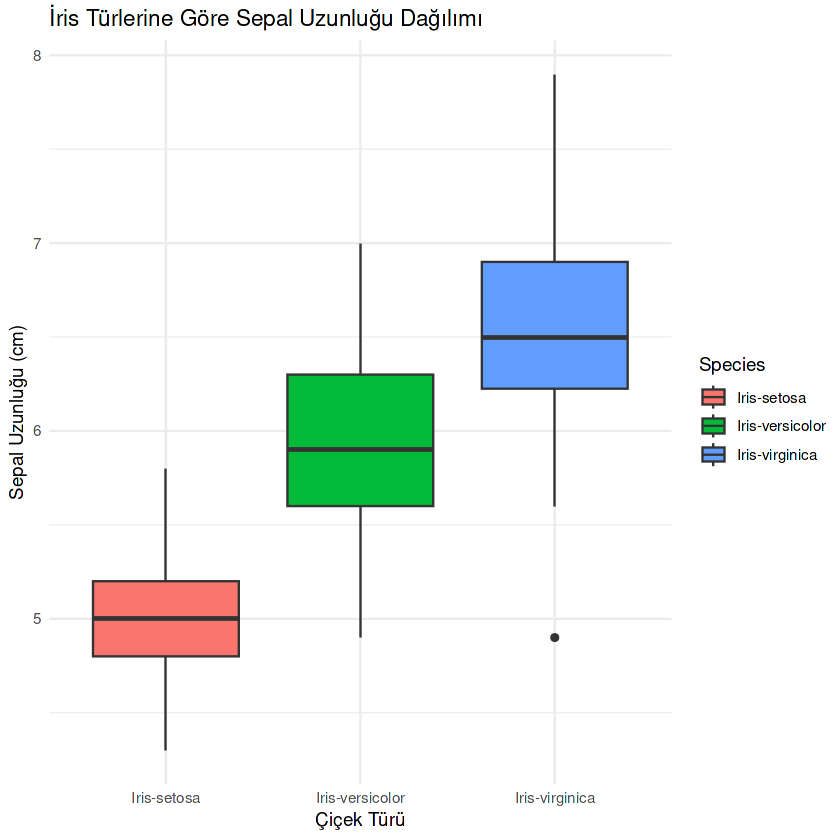

toplam_uzunluk
<dbl>
1440.3


Korelasyon sonucu : 0.871754157304871 
Güçlü pozitif ilişki


`geom_smooth()` using formula = 'y ~ x'


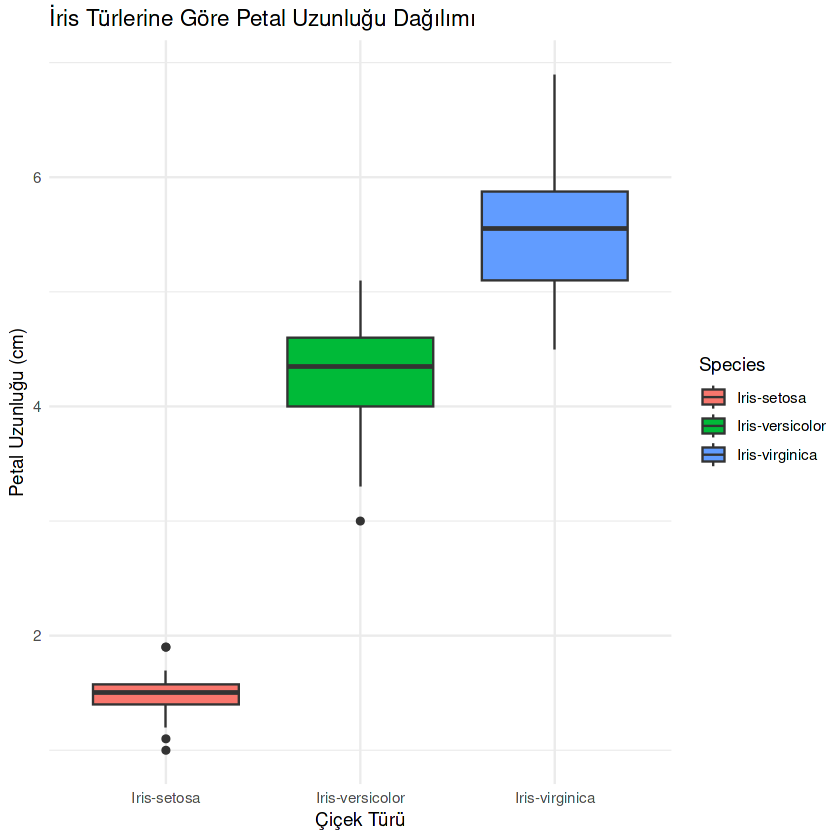

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


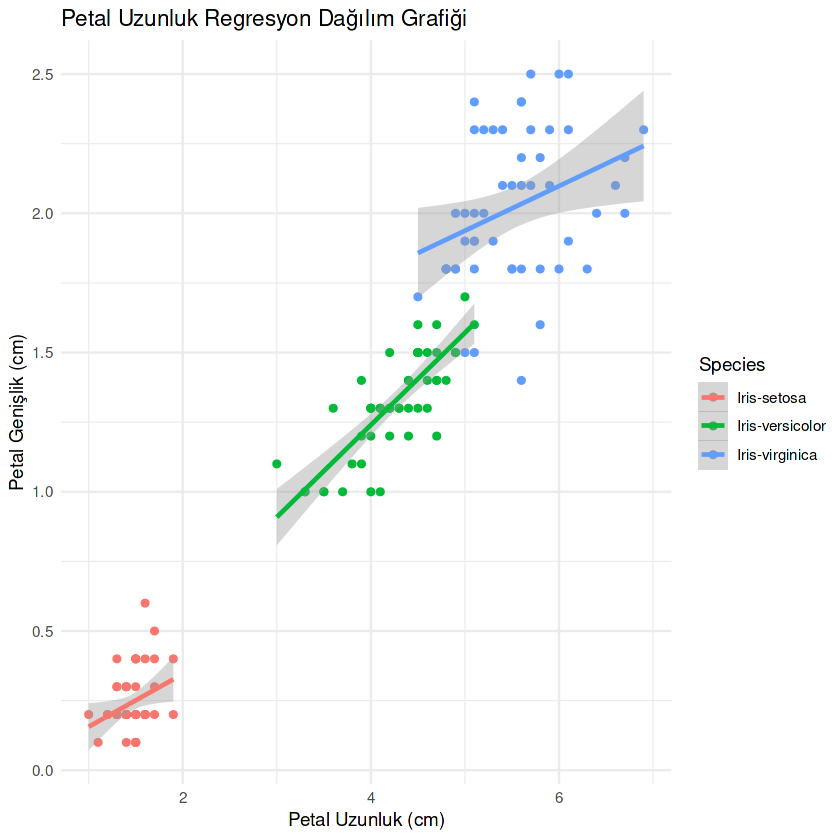

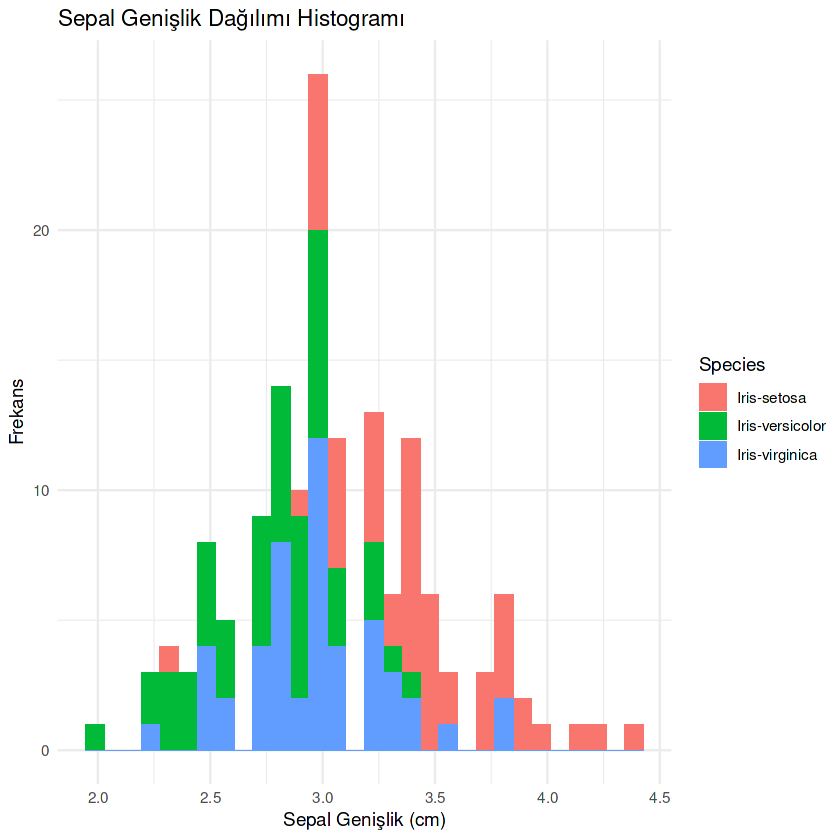

In [2]:
library(tidyverse)
iris <- read.csv("/kaggle/input/iris/Iris.csv")
# Türlere göre ortalama boyutlar
iris_ortalama <- iris %>%
  group_by(Species) %>%
  summarise(
      ort_sepal_uzunluk = mean(SepalLengthCm),
      ort_sepal_genislik = mean(SepalWidthCm),
      ort_petal_uzunluk = mean(PetalLengthCm),
      ort_petal_genislik = mean(PetalWidthCm)
  )
iris_ortalama
#Türlere göre boxplot grafikleri
#SepalLength, PetalLength gibi değişkenlerin dağılımlarını kutu grafikleriyle gösterelim
ggplot(iris, aes(x = Species, y = SepalLengthCm, fill = Species)) +
geom_boxplot() +
labs(
    title = "İris Türlerine Göre Sepal Uzunluğu Dağılımı",
    x = "Çiçek Türü",
     y = "Sepal Uzunluğu (cm)"
) +
theme_minimal()

ggplot(iris, aes(x = Species, y = PetalLengthCm, fill = Species)) +
geom_boxplot() +
labs(
    title = "İris Türlerine Göre Petal Uzunluğu Dağılımı",
    x = "Çiçek Türü",
    y = "Petal Uzunluğu (cm)"
) +
theme_minimal()

#mutate() ile TotalLength = SepalLength + PetalLength kullanımı
iris <- iris %>%
  mutate(TotalLength = SepalLengthCm + PetalLengthCm) 
yeni_sutun <- iris %>%
  summarise(toplam_uzunluk = sum(TotalLength))
yeni_sutun

#Çiçek türlerine göre korelasyonlar, cor() ile sayısal değişkenler arasında ilişki
cor_sonuc <- cor(iris$SepalLengthCm, iris$PetalLengthCm)
cat(paste("Korelasyon sonucu :", cor_sonuc, "\n"))
if(cor_sonuc > 0.7){
    cat("Güçlü pozitif ilişki\n")
} else if(cor_sonuc > 0.3 && cor_sonuc <= 0.7){
    cat("Orta düzeyde pozitif ilişki\n")
} else if(cor_sonuc > 0){
    cat("Zayıf ilişki\n")
} else {
    cat("Negatif ilişki\n")
}

#Dağılım grafikleri (scatter plot), geom_smooth() ile regresyon çizgisi ekleneme
ggplot(iris, aes(x = PetalLengthCm, y = PetalWidthCm, color = Species)) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE) +
    labs(
        title = "Petal Uzunluk Regresyon Dağılım Grafiği",
        x = "Petal Uzunluk (cm)",
        y = "Petal Genişlik (cm)"
    ) +
    theme_minimal()

#Histogram analizi
ggplot(iris, aes(x = SepalWidthCm, fill = Species)) +
  geom_histogram() +
  labs(
      title = "Sepal Genişlik Dağılımı Histogramı",
      x = "Sepal Genişlik (cm)",
      y = "Frekans"
  ) +
  theme_minimal()


